## **Exponentially Weighted Moving Average** **`EWMA`**

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Load and Preprocess Data

In [2]:
df = pd.read_csv("../DATASETS/TimeSeriesData.csv")
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [3]:
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')
df.set_index('Period', inplace=True)

df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-01 to 2022-12-01
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Revenue                                   64 non-null     float64
 1   Sales_quantity                            64 non-null     float64
 2   Average_cost                              64 non-null     float64
 3   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4)
memory usage: 3.8 KB


In [4]:
df.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0


## Calculate EWMA for All Numeric Columns

In [5]:
# Define alpha values
alpha_values = [0.1, 0.3, 0.5, 0.9]

# Calculate EWMA for each numeric column
numeric_columns = ['Revenue', 'Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region']

for column in numeric_columns:
    for alpha in alpha_values:
        df[f'{column}_EWMA_{alpha}'] = df[column].ewm(alpha=alpha).mean()

## Create Visualization Functions

In [6]:
def plot_ewma_comparision(column_name, alpha_values=[0.1,0.3,0.5,0.9]):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column_name], 'o-', label='Actual', alpha=0.7, markersize=3)

    for alpha in alpha_values:
        plt.plot(df.index, df[f'{column_name}_EWMA_{alpha}'],
                 label=f'EWMA (α={alpha})', linewidth=2)
        
        plt.title(f'{column_name} - EWMA Analysis')
        plt.ylabel(column_name)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## Generate EWMA Plots for All Variables

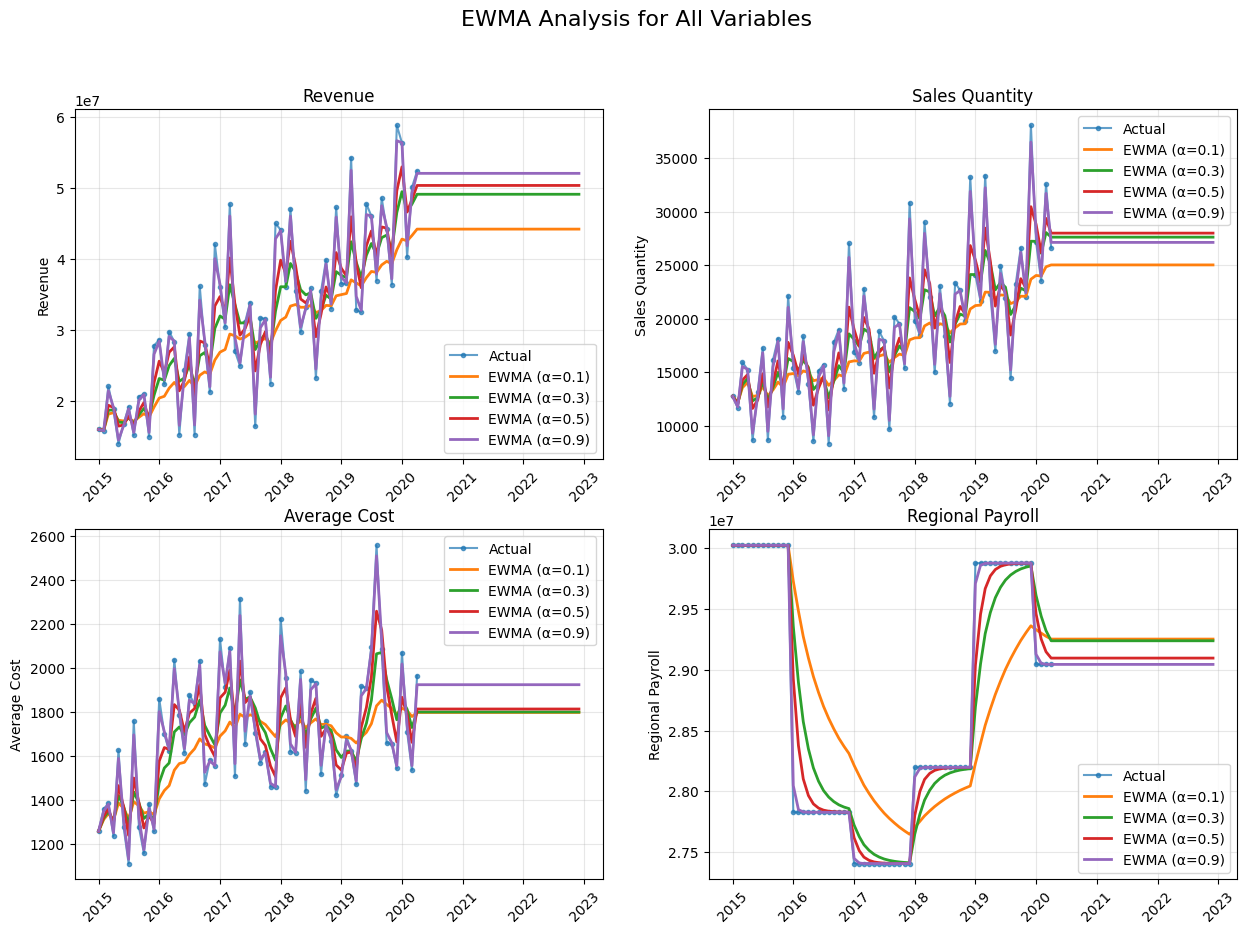

In [7]:
# Create subplots for all variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('EWMA Analysis for All Variables', fontsize=16)

metrics = ['Revenue', 'Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region']
titles = ['Revenue', 'Sales Quantity', 'Average Cost', 'Regional Payroll']

for i ,(metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[i//2, i%2]
    ax.plot(df.index, df[metric], 'o-', label='Actual', alpha=0.7, markersize=3)

    for alpha in alpha_values:
        ax.plot(df.index, df[f'{metric}_EWMA_{alpha}'], 
                label=f'EWMA (α={alpha})', linewidth=2)
    
    ax.set_title(f'{title}')
    ax.set_ylabel(title)
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

## Add Correlation Analysis

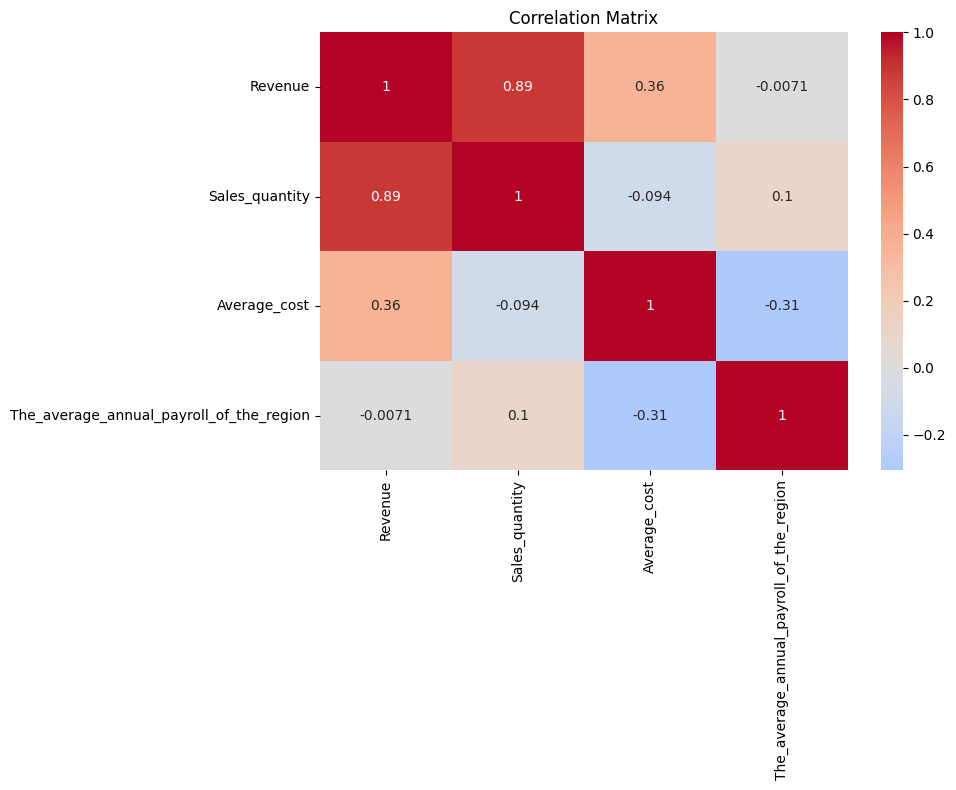

In [8]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Add Statistical Summary

In [9]:
print("Statistical Summary")
print(df[numeric_columns].describe().round(2))

Statistical Summary
           Revenue  Sales_quantity  Average_cost  \
count        64.00           64.00         64.00   
mean   32360452.26        19197.38       1695.06   
std    11641498.54         6591.29        296.84   
min    14021479.61         8314.00       1110.58   
25%    22426546.79        15065.50       1499.14   
50%    32090875.10        18368.00       1654.40   
75%    39929985.09        22856.25       1916.40   
max    58756473.66        38069.00       2559.33   

       The_average_annual_payroll_of_the_region  
count                                     64.00  
mean                                28690829.62  
std                                  1057190.52  
min                                 27406473.00  
25%                                 27828571.00  
50%                                 28197847.00  
75%                                 29878525.00  
max                                 30024676.00  


## Add Seasonal Decomposition (Optional)

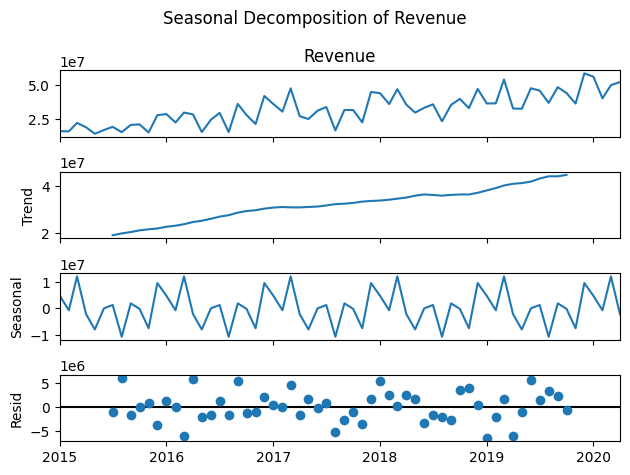

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# For each variable, you can perform seasonal decomposition
# Example for Revenue:
result = seasonal_decompose(df['Revenue'].dropna(), model='additive', period=12)
result.plot()
plt.suptitle('Seasonal Decomposition of Revenue')
plt.tight_layout()
plt.show()

## Add Forecast Function (Optional)

In [11]:
def forecast_ewma(series, alpha=0.3, periods=12):
    """Forecast using EWMA"""
    # Calculate the last EWMA value
    last_ewma = series.ewm(alpha=alpha).mean().iloc[-1]
    
    # Create future dates
    last_date = series.index[-1]
    future_dates = pd.date_range(start=last_date, periods=periods+1, freq='M')[1:]
    
    # Create forecast (EWMA is constant for future predictions)
    forecast = pd.Series([last_ewma] * periods, index=future_dates)
    
    return forecast